In [3]:
!pip install AugmentedSocialScientist pandas numpy wordcloud matplotlib spacy nltk
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 11.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


# Description des annotations

In [1]:
import pandas as pd

current_annotations_file = "../data/intermediate/annotations/personne_1400annotations_2024-03-27_ActiveTigger.csv"

annotations_file = pd.read_csv(current_annotations_file, dtype = {'sentence_id':'int', 
'Personne':'str','sentence_text':'str'}).set_index('sentence_id')

annotations_file.head(5)

Personne  \
sentence_id                                     
1220587                          Corps humain   
1360306      Personne responsable et autonome   
580205       Personne responsable et autonome   
700014       Personne responsable et autonome   
870085                    Personne à protéger   

                                                 sentence_text  
sentence_id                                                     
1220587      S’il semble dès lors naïf de penser que le sen...  
1360306      Certains parcours de soins, les limites des po...  
580205       Un rapport\neuropéen (Koch et al ., 1996, [56]...  
700014       Dans de nombreux cas, il n'existe pas de texte...  
870085       Cette situation place parfois la médecine en u...

In [2]:
base_shuffled = pd.read_pickle("../data/intermediate/big/base_shuffled.pkl")
base_shuffled.sentence_id = base_shuffled.sentence_id.apply(int)

base_shuffled.set_index('sentence_id', inplace= True)

base_shuffled.head(5)

sentence_text  \
sentence_id                                                      
770722       Avec l’accumulation de grandes quantités de do...   
930350       Le critère du consentement : le consentement p...   
1070205      Notons, en outre, que si l’on considérait que ...   
180058       Dans cette perspective, on concluera que légit...   
1301177      Qui fautil informer, quand et com ment ? Comme...   

                                                      sentence  personne  \
sentence_id                                                                
770722       Le principe de la noncommercialisation du corp...     False   
930350       Dans la mesure où le matériel biologique brut ...      True   
1070205      Or, le Comité estime pr écisément que la catég...      True   
180058       De fondation, en vertu même des principes qui ...      True   
1301177      Comment respecter le droit \nde la personne de...      True   

             humain  individu  \
sentence_id                     
770722         True     False   
930350        False     False   
1070205       False     False   
180058        False     False   
1301177       False     False   

                                                         Titre       Date  \
sentence_id                                                                 
770722       Problèmes éthiques posés par les collections d... 2003-03-20   
930350       Commercialisation des cellules souches humaine... 2006-06-22   
1070205      Avis sur les problèmes éthiques liés aux diagn... 2009-10-15   
180058       Etat des études conduites par le Comité concer... 1989-12-15   
1301177      Données massives et santé : Etat des lieux, pr... 2019-06-29   

                    president                                   rapporteurs  \
sentence_id                                                                   
770722         Sicard (00-08)  Hélène Gaumont-Prat,Nicole Questiaux,G. Orth   
930350         Sicard (00-08)                         Monique Canto-Sperber   
1070205      Grimfeld (09-11)        Pierre Le Coz,Dominique Stoppa-Lyonnet   
180058        Bernard (83-91)                                           NaN   
1301177      Delfraissy (16-)           Laure Coulombel,Pierre Delmas-Goyon   

                                                    membres_gt  \
sentence_id                                                      
770722       N. Baumann,Anne Combon-Thompsen,Monique Canto-...   
930350       Anne Cambon-Thomsen,Hélène Gaumont-Prat,Chanta...   
1070205      Annick Alpérovitch,Joëlle Belaisch-Allart,Fréd...   
180058                                                     NaN   
1301177      Gilles Adda,Thomas Bourgeron,Jean-Marie Delaru...   

                               theme  saisine  divergence  CNPEN  \
sentence_id                                                        
770722                       Société    False         0.0    0.0   
930350             Don, consentement    False         0.0    0.0   
1070205                  Procréation    False         0.0    0.0   
180058       Génétique et Diagnostic    False         0.0    0.0   
1301177                      Société     True         0.0    0.0   

             tableaux et graphiques  nb_mots  number_sentences  nb_pages  \
sentence_id                                                                
770722                            1    22196               730        51   
930350                            0    22028               703        40   
1070205                           0    14877               520        28   
180058                            0     4177               142         8   
1301177                           0    44296              1373        94   

             sentence_index  num  
sentence_id                       
770722                  722   77  
930350                  350   93  
1070205                 205  107  
180058                   58   18  
1301177                1177  130

In [3]:
annotations_file = annotations_file.join(base_shuffled[['sentence']], how = "left")

annotations_file

Personne  \
sentence_id                                     
1220587                          Corps humain   
1360306      Personne responsable et autonome   
580205       Personne responsable et autonome   
700014       Personne responsable et autonome   
870085                    Personne à protéger   
...                                       ...   
1360729                                   NaN   
920101                                    NaN   
820288                                    NaN   
1370027                                   NaN   
1260444                                   NaN   

                                                 sentence_text  \
sentence_id                                                      
1220587      S’il semble dès lors naïf de penser que le sen...   
1360306      Certains parcours de soins, les limites des po...   
580205       Un rapport\neuropéen (Koch et al ., 1996, [56]...   
700014       Dans de nombreux cas, il n'existe pas de texte...   
870085       Cette situation place parfois la médecine en u...   
...                                                        ...   
1360729      A quoi consent une personne malade lorsqu’elle...   
920101       Les  conditions  du  dépistage  devraient  pas...   
820288       Il ne faut pas non plus exclure l’éventualité ...   
1370027      C’est le sens de la proposition du CCNE de met...   
1260444      Cette \nsouffra nce doit être prise en compte....   

                                                      sentence  
sentence_id                                                     
1220587      Il importe donc de tenir compte de toutes les ...  
1360306      Ces personnes donnent un consentement qui relè...  
580205       Sur le plan éthique, cette évolution peut être...  
700014       C'est dans ce cadre que peut se\nposer la ques...  
870085       Si le sujet est majeur, \nson refus de transfu...  
...                                                        ...  
1360729      : Comme souligné  par le  Groupe de travail « ...  
920101       Accueillir des personnes vulnérables ne saurai...  
820288       c. Etat des lieux concernant la demande de rec...  
1370027      137 \n \n \n6 \n PREAMBULE  \n \nLa pandémie d...  
1260444      Les techniques d’AMP sont des traitements cont...  

[2000 rows x 3 columns]

## Description des catégories en nombre et recodage

In [4]:
import pandas as pd
simplify_labels = False
take_sentence_with_context = False

if(take_sentence_with_context):
    text_var = "sentence_text"
else:
    text_var = "sentence"

# defining the label variable, with a possible recategorization before training
label_categories = {
    "Poubelle" : "Anything but personne à protéger",
    "Humain comme empathie" : "Anything but personne à protéger",
    "Sentiment humain": "Anything but personne à protéger",
    "Genre/espèce humaine": "Anything but personne à protéger",
    "Matériel biologique": "Anything but personne à protéger",
    "Individu": "Anything but personne à protéger",
    "Individu ou sujet" : "Anything but personne à protéger",
    "Agent responsable":"Anything but personne à protéger",
    "Personne responsable et autonome" : "Anything but personne à protéger",
    "Personne relationnelle": "Anything but personne à protéger",
    "Personne à protéger":"Personne à protéger"
}

if(simplify_labels):
    annotations_file['label'] = annotations_file['Personne'].map(label_categories)
else:
    annotations_file['label'] = annotations_file['Personne']

# defining text variable    
annotations_file['text'] = annotations_file[text_var]


annotations_file.sample(5)

Personne  \
sentence_id                         
1250431      Genre/espèce humaine   
1300321       Personne à protéger   
1170347              Corps humain   
1330203         Individu ou sujet   
600329                        NaN   

                                                 sentence_text  \
sentence_id                                                      
1250431      Le changement climatique \nest à la fois une m...   
1300321      Fautil considérer que la \ndonnée est un « obj...   
1170347      Les cellules souches « multipotentes  », elles...   
1330203      Ainsi,  l’utilisation  de la technique  CRISPR...   
600329       Il semblerait que ce Projet n'ait pas été envo...   

                                                      sentence  \
sentence_id                                                      
1250431      Quel que soit l’éventail des modèles culturels...   
1300321      Doiton au contraire estimer que celleci donne ...   
1170347      Elles représentent une partie des cellules sou...   
1330203      Dans les espèces  à reproduction  rapide,  ce ...   
600329       Dans ce projet de réponse on trouve :\n- la pr...   

                            label  \
sentence_id                         
1250431      Genre/espèce humaine   
1300321       Personne à protéger   
1170347              Corps humain   
1330203         Individu ou sujet   
600329                        NaN   

                                                          text  
sentence_id                                                     
1250431      Quel que soit l’éventail des modèles culturels...  
1300321      Doiton au contraire estimer que celleci donne ...  
1170347      Elles représentent une partie des cellules sou...  
1330203      Dans les espèces  à reproduction  rapide,  ce ...  
600329       Dans ce projet de réponse on trouve :\n- la pr...

In [5]:
# filtering out not annotated (na) and some categories
annotations = annotations_file.dropna()
annotations = annotations[~annotations["Personne"].isin(["Poubelle"])]
annotations.sample(5)

Personne  \
sentence_id                           
50217             Individu ou sujet   
1290996           Individu ou sujet   
1240456        Genre/espèce humaine   
500305                 Corps humain   
1280254      Personne relationnelle   

                                                 sentence_text  \
sentence_id                                                      
50217        La préoccupation de laisser le maximum de soup...   
1290996      Lors des tâches effectuées, des images \nsont ...   
1240456      Avis  N° 124 32 \nIII / L’avenir de  l’informa...   
500305       Quels que soient les progrès obtenus en matièr...   
1280254      Comment valoriser la réflexion \néthique inter...   

                                                      sentence  \
sentence_id                                                      
50217        Ce Comité d'éthique devrait :\n1) s'assurer de...   
1290996      C’est le cas de l’utilisation de l’IRMf comme ...   
1240456      C’est là sans doute un bouleversement éthique ...   
500305       La réversibilité d'une technique de stérilisat...   
1280254      De même, \ncommuniquer a vec la personne en so...   

                              label  \
sentence_id                           
50217             Individu ou sujet   
1290996           Individu ou sujet   
1240456        Genre/espèce humaine   
500305                 Corps humain   
1280254      Personne relationnelle   

                                                          text  
sentence_id                                                     
50217        Ce Comité d'éthique devrait :\n1) s'assurer de...  
1290996      C’est le cas de l’utilisation de l’IRMf comme ...  
1240456      C’est là sans doute un bouleversement éthique ...  
500305       La réversibilité d'une technique de stérilisat...  
1280254      De même, \ncommuniquer a vec la personne en so...

In [6]:
annotations["Personne"].value_counts()

Personne
Individu ou sujet                   232
Personne à protéger                 230
Corps humain                        229
Personne relationnelle              222
Personne responsable et autonome    220
Genre/espèce humaine                214
Sentiment humain                     35
Name: count, dtype: int64

In [7]:
annotations["label"].value_counts()

label
Individu ou sujet                   232
Personne à protéger                 230
Corps humain                        229
Personne relationnelle              222
Personne responsable et autonome    220
Genre/espèce humaine                214
Sentiment humain                     35
Name: count, dtype: int64

## Description lexicographique

In [8]:
import pandas as pd
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the French language model from spaCy
nlp = spacy.load("fr_core_news_sm")

# Function to lemmatize text
def lemmatize_text(text):
    custom_stop_words = ["e"]
    doc = nlp(text)
    lemmatized = " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token in custom_stop_words])
    return lemmatized

# Apply lemmatization to the 'text' column
annotations['lemmatized_text'] = annotations['text'].apply(lemmatize_text)

In [9]:
import re
def filter_words(text):

    # Compile regex pattern with word boundaries
    pattern = re.compile(r'\b(?:' + '|'.join(words_to_filter) + r')\b', flags=re.IGNORECASE)
    return pattern.sub('', text)

In [10]:
words_to_filter = ['l','e','ceue']

annotations["lemmatized_text"]=annotations["lemmatized_text"].apply(filter_words)

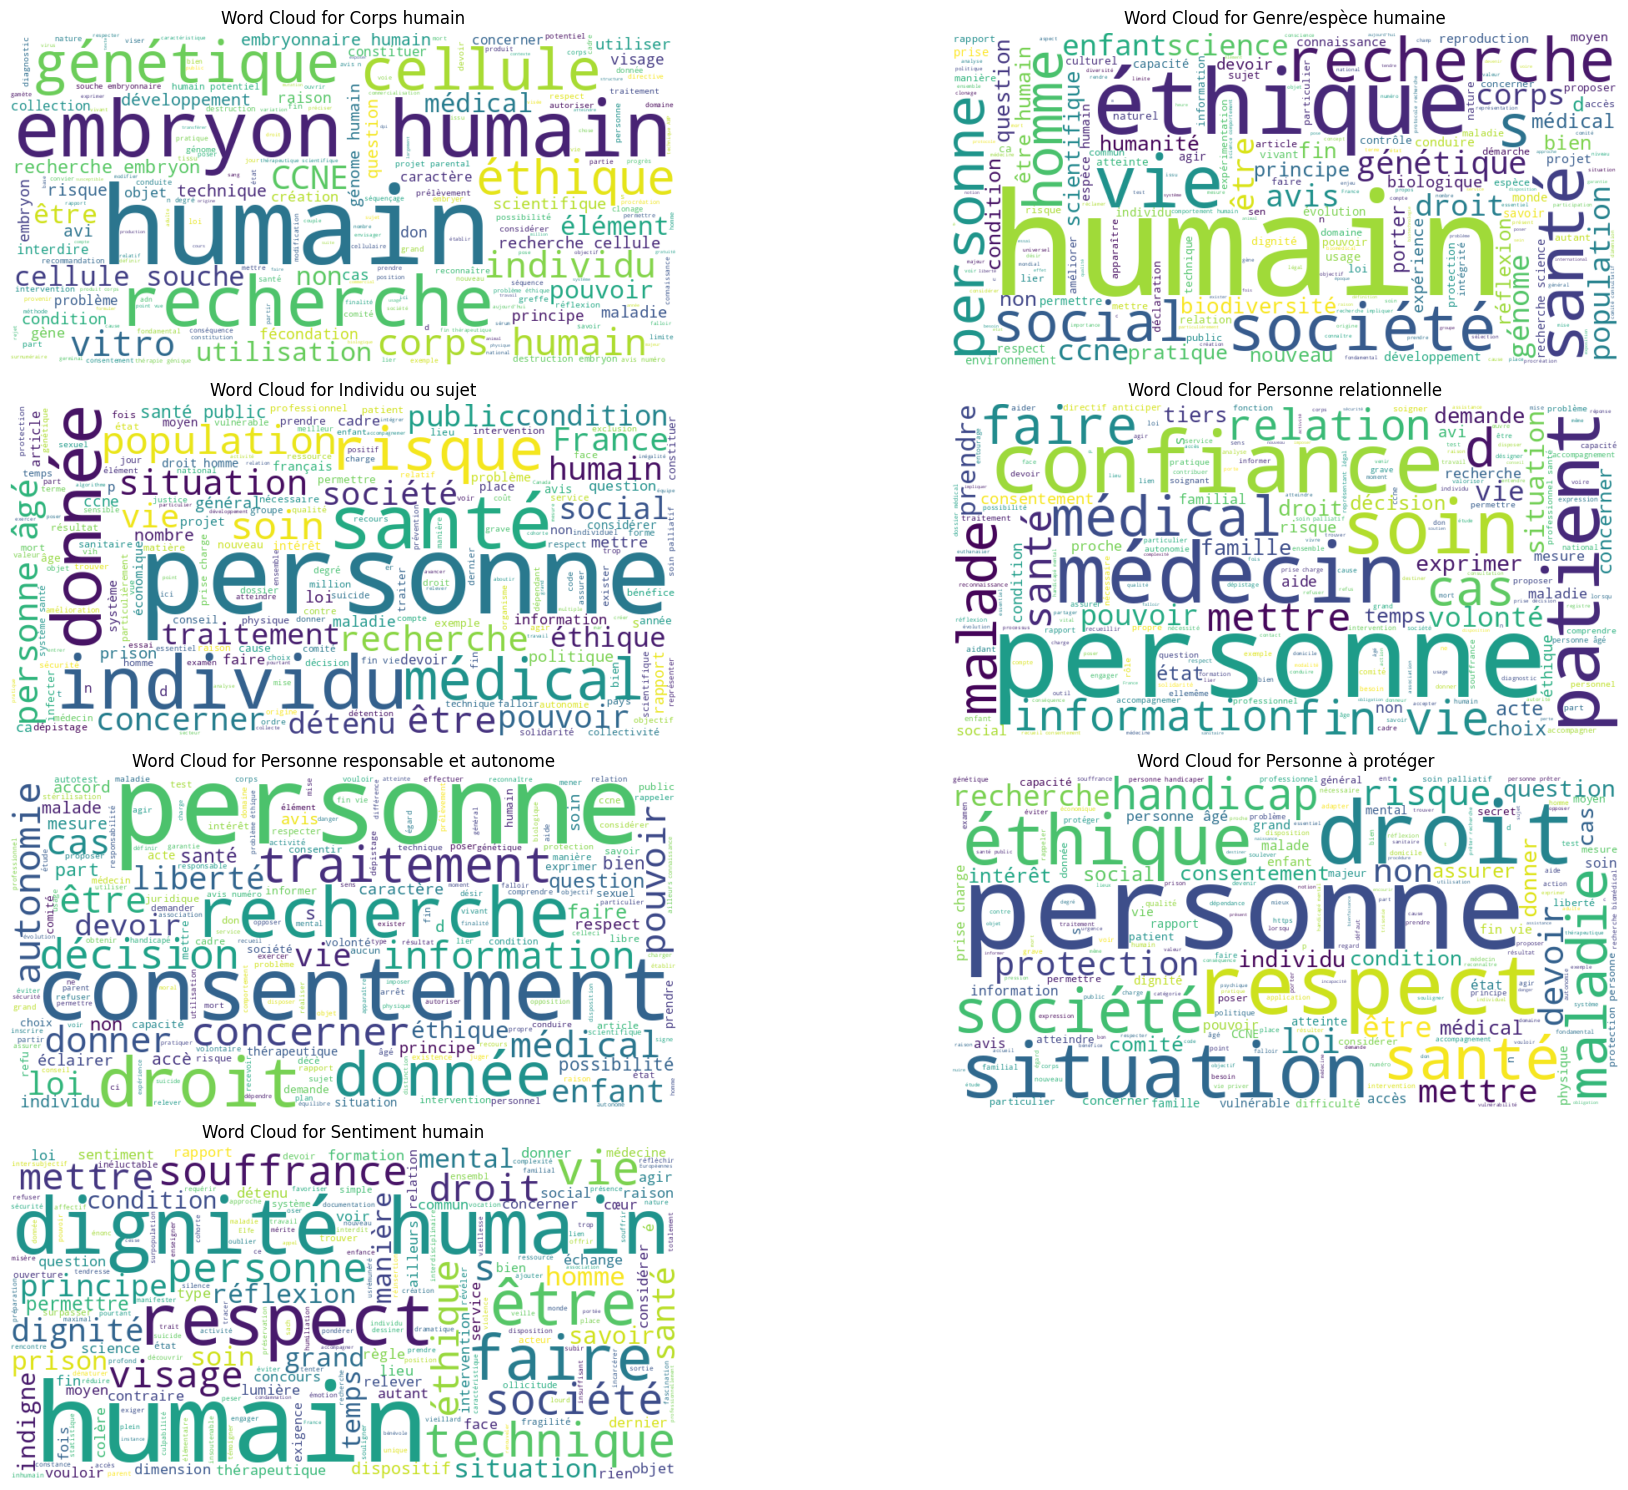

In [11]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Determine the number of categories
num_categories = annotations['Personne'].nunique()

# Setup plot grid (2 columns, 3 rows max)
cols = 2
rows = round(num_categories/cols)
# Create the figure with a gridspec
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(rows, cols, figure=fig)

# Counter for subplot index
subplot_index = 0

for category, group in annotations.groupby('Personne'):
    combined_text = " ".join(group['lemmatized_text'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(combined_text)
    
    # Calculate row, col index for the current subplot
    row = subplot_index // cols
    col = subplot_index % cols
    
    ax = fig.add_subplot(gs[row, col])
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Word Cloud for {category}')
    ax.axis('off')
    
    subplot_index += 1

plt.tight_layout()
plt.show()

In [12]:
words_to_filter = ['recherche','humain','médical','médecin','personne','soin','éthique','santé','droit','l','e','ceue']

annotations["lemmatized_text_without_big_words"]=annotations["lemmatized_text"].apply(filter_words)


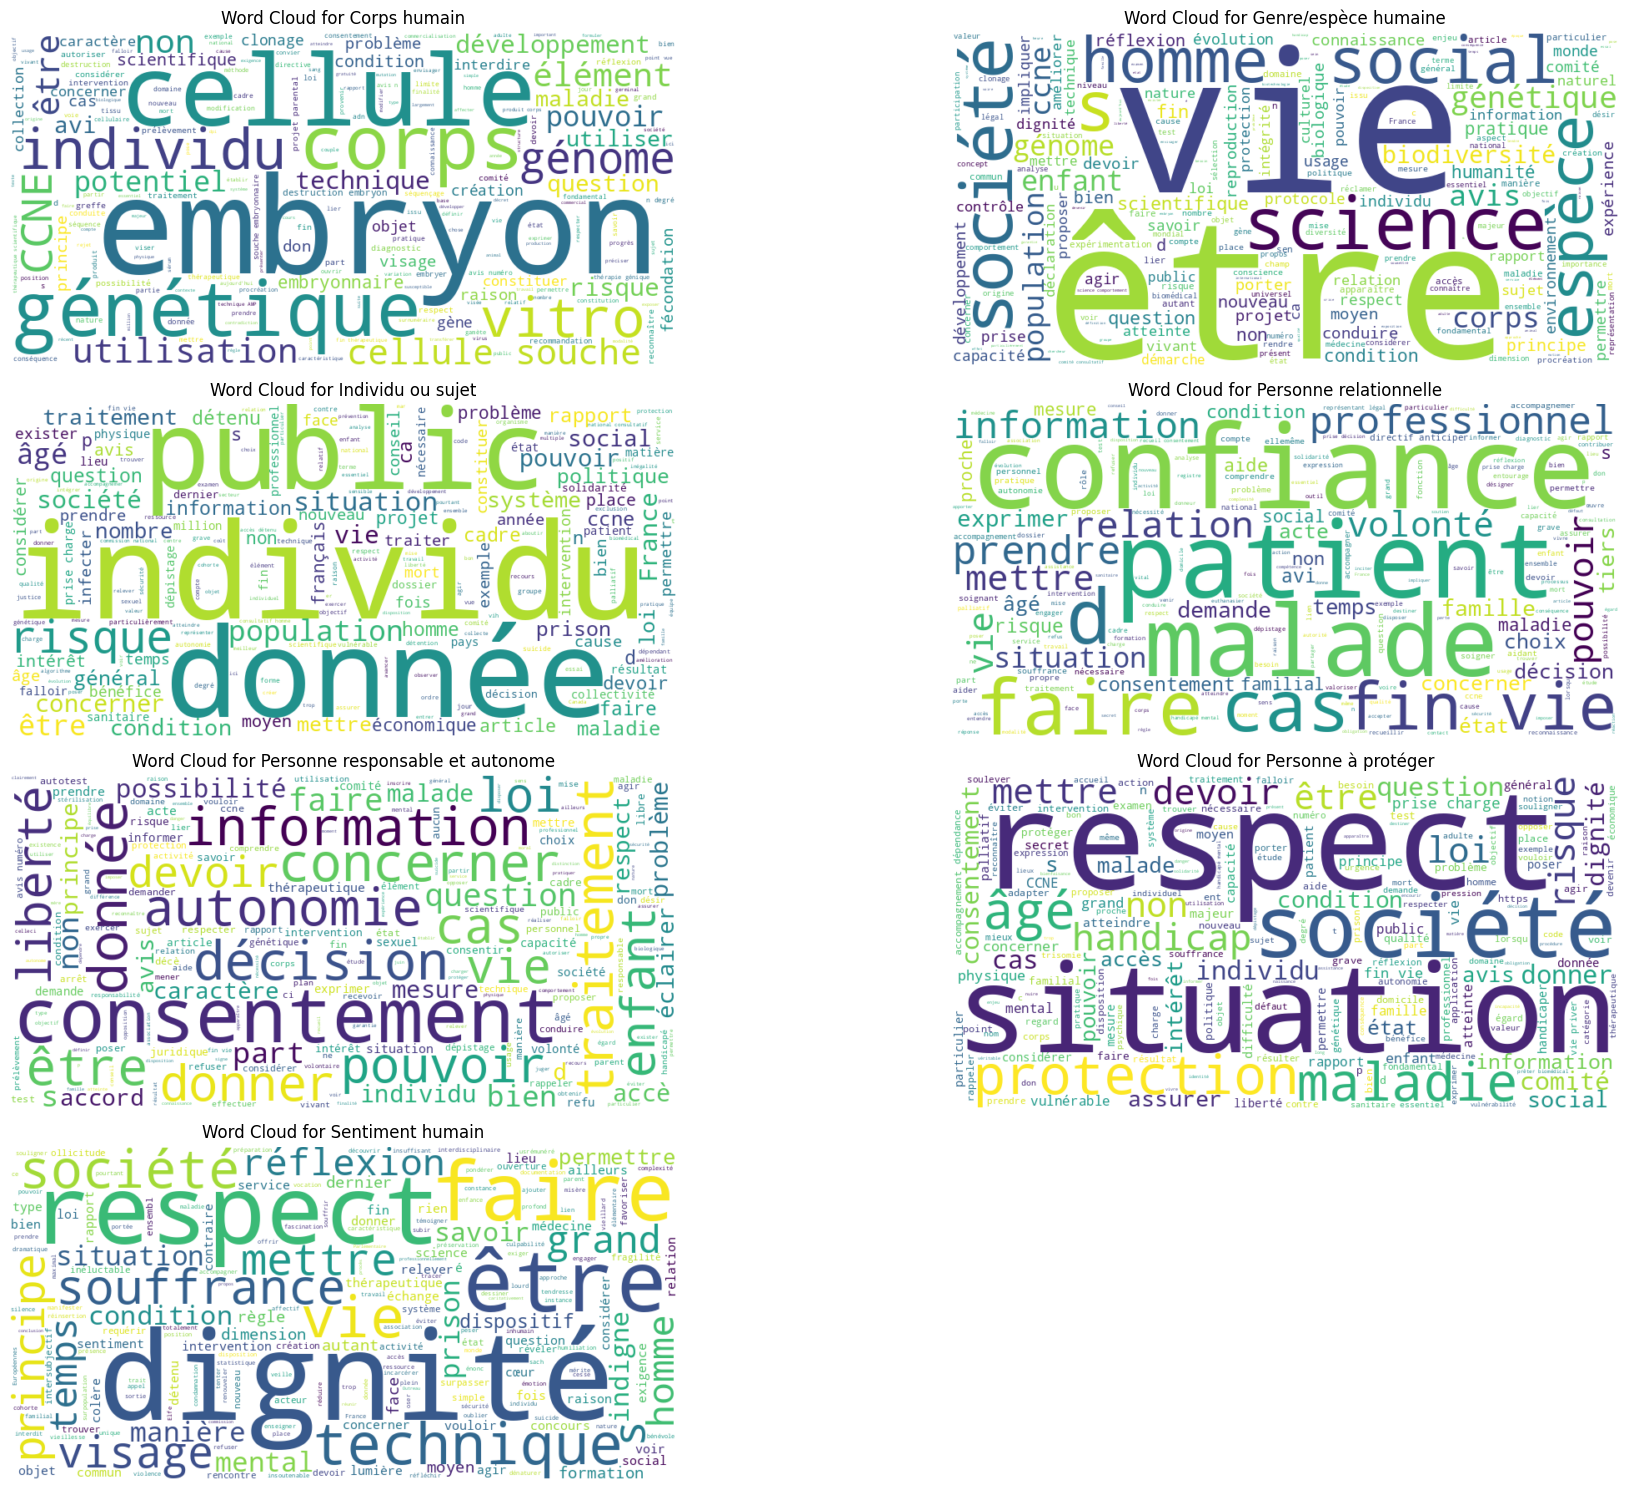

In [13]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Determine the number of categories
num_categories = annotations['Personne'].nunique()

# Setup plot grid (2 columns, 3 rows max)
cols = 2
rows = round(num_categories/cols)
# Create the figure with a gridspec
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(rows, cols, figure=fig)

# Counter for subplot index
subplot_index = 0

for category, group in annotations.groupby('Personne'):
    combined_text = " ".join(group['lemmatized_text_without_big_words'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(combined_text)
    
    # Calculate row, col index for the current subplot
    row = subplot_index // cols
    col = subplot_index % cols
    
    ax = fig.add_subplot(gs[row, col])
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Word Cloud for {category}')
    ax.axis('off')
    
    subplot_index += 1

plt.tight_layout()
plt.show()

# Bert classification

In [14]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

from torch import cuda

cuda.get_device_name(0)

'Tesla T4'

In [15]:
from sklearn.model_selection import train_test_split
 
train_data, test_data = train_test_split(annotations, train_size=0.80)

In [16]:
from AugmentedSocialScientist.models import Camembert

bert = Camembert()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


There are 1 GPU(s) available.
We will use GPU 0: Tesla T4


In [17]:
batch_size = 16
train_loader = bert.encode(train_data.text.values,
train_data.label.values, batch_size=batch_size)

  0%|          | 0/1105 [00:00<?, ?it/s]

  0%|          | 0/1105 [00:00<?, ?it/s]

label ids: {'Corps humain': 0, 'Genre/espèce humaine': 1, 'Individu ou sujet': 2, 'Personne relationnelle': 3, 'Personne responsable et autonome': 4, 'Personne à protéger': 5, 'Sentiment humain': 6}


In [18]:
test_loader = bert.encode(test_data.text.values,
test_data.label.values, batch_size=batch_size)

  0%|          | 0/277 [00:00<?, ?it/s]

  0%|          | 0/277 [00:00<?, ?it/s]

label ids: {'Corps humain': 0, 'Genre/espèce humaine': 1, 'Individu ou sujet': 2, 'Personne relationnelle': 3, 'Personne responsable et autonome': 4, 'Personne à protéger': 5, 'Sentiment humain': 6}


In [19]:
scores = bert.run_training(
    train_loader,
    test_loader,
    n_epochs=3,
    lr=2e-5,
    random_state=42,
    save_model_as='clickbait'
    )

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/mamba/lib/python3.11/site-packages/transformers/optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



======== Epoch 1 / 3 ========
Training...
  Batch    40  of     70.    Elapsed: 0:00:31.

  Average training loss: 1.87
  Training took: 0:00:53

Running Validation...

  Average test loss: 1.77
  Validation took: 0:00:03
                                  precision    recall  f1-score   support

                    Corps humain       0.49      0.87      0.63        47
            Genre/espèce humaine       0.52      0.29      0.37        42
               Individu ou sujet       1.00      0.10      0.18        52
          Personne relationnelle       0.24      0.90      0.38        31
Personne responsable et autonome       0.00      0.00      0.00        45
             Personne à protéger       0.34      0.35      0.34        49
                Sentiment humain       0.00      0.00      0.00        11

                        accuracy                           0.37       277
                       macro avg       0.37      0.36      0.27       277
                    weighted avg   

/opt/mamba/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/mamba/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/mamba/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/mamba/lib/python3.11/site-packages/sklearn/m

  Batch    40  of     70.    Elapsed: 0:00:30.

  Average training loss: 1.66
  Training took: 0:00:52

Running Validation...

  Average test loss: 1.57
  Validation took: 0:00:03
                                  precision    recall  f1-score   support

                    Corps humain       0.62      0.89      0.73        47
            Genre/espèce humaine       0.59      0.38      0.46        42
               Individu ou sujet       0.83      0.37      0.51        52
          Personne relationnelle       0.29      0.90      0.44        31
Personne responsable et autonome       0.24      0.09      0.13        45
             Personne à protéger       0.40      0.39      0.40        49
                Sentiment humain       0.00      0.00      0.00        11

                        accuracy                           0.46       277
                       macro avg       0.42      0.43      0.38       277
                    weighted avg       0.49      0.46      0.43       277


==

/opt/mamba/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/mamba/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/mamba/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/mamba/lib/python3.11/site-packages/sklearn/m

  Batch    40  of     70.    Elapsed: 0:00:31.

  Average training loss: 1.52
  Training took: 0:00:55

Running Validation...

  Average test loss: 1.51
  Validation took: 0:00:03
                                  precision    recall  f1-score   support

                    Corps humain       0.70      0.85      0.77        47
            Genre/espèce humaine       0.62      0.62      0.62        42
               Individu ou sujet       0.68      0.48      0.56        52
          Personne relationnelle       0.32      0.87      0.47        31
Personne responsable et autonome       0.33      0.24      0.28        45
             Personne à protéger       0.42      0.20      0.27        49
                Sentiment humain       0.00      0.00      0.00        11

                        accuracy                           0.50       277
                       macro avg       0.44      0.47      0.43       277
                    weighted avg       0.50      0.50      0.48       277


Tr

/opt/mamba/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/mamba/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/mamba/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/mamba/lib/python3.11/site-packages/sklearn/m

Résultat avec sentence_text
  Average test loss: 1.56
  Validation took: 0:00:08
                                  precision    recall  f1-score   support

                    Corps humain       0.49      0.82      0.62        39
            Genre/espèce humaine       0.75      0.47      0.58        45
               Individu ou sujet       0.68      0.47      0.56        53
          Personne relationnelle       0.30      0.87      0.44        39
Personne responsable et autonome       0.38      0.26      0.31        42
             Personne à protéger       0.25      0.02      0.03        54
                Sentiment humain       0.00      0.00      0.00         5

                        accuracy                           0.45       277
                       macro avg       0.41      0.42      0.36       277
                    weighted avg       0.47      0.45      0.40       277

In [20]:
import numpy as np
pred_data = annotations_file[annotations_file["label"].isna()][["text"]].dropna()
pred_loader = bert.encode(pred_data.text.values, batch_size=batch_size)
pred_proba = bert.predict_with_model(pred_loader, model_path='./models/clickbait')
pred_data['pred_label'] = np.argmax(pred_proba, axis=1)
pred_data['pred_proba'] = np.max(pred_proba, axis=1)

  0%|          | 0/598 [00:00<?, ?it/s]

  0%|          | 0/598 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

label ids: {'Corps humain': 0, 'Genre/espèce humaine': 1, 'Individu ou sujet': 2, 'Personne relationnelle': 3, 'Personne responsable et autonome': 4, 'Personne à protéger': 5, 'Sentiment humain': 6}


In [21]:
pred_data["pred_proba"].describe()

count    598.000000
mean       0.265045
std        0.062830
min        0.174725
25%        0.220936
50%        0.241333
75%        0.293150
max        0.397288
Name: pred_proba, dtype: float64

In [22]:
pd.set_option('display.max_colwidth', None)  # Use None to show all the text, or set a large number

pred_data

text  \
1138             Et à l’importance nouvelle que prenait le projet parental répondait l’émergence d’une forme  \nnouvelle de responsabilité médicale et sociale quant au devenir de cet embryon avant son  \ntransfert dans le corps de la mère. C’est dans ce contexte radicalement nouveau de début de la vie humaine qu’est apparue la  \nquestion nouvelle du devenir de ces embryons in vitro lorsqu’ils n’étaient pas transférés dans  \nle corps de leur mère. Il  y  a  aujourd’hui  au  moins  trois  circonstances  qui  vont  conduire  à  une  décision \nmédicale d’absence de transfert  d’un embryon créé  in vitro  par AMP dans le cadre d’un  \nprojet parental :\n1. lorsqu’une anomalie majeure ou une interruption du développement d’un embryon est  \nmanifeste in vitro, avant son transfert dans le corps de sa mère  ;\n2. lorsqu’au cours d’un diagnostic préimplantatoire (DPI), un embryon se révèle être porteur  \nde la séquence génétique en cause dans une maladie familiale d’une particulière gravité et  \n4\nincurable  au  moment  du  diagnostic,  séquence  génétique  dont  la  recherche  a  motivé  la  \nréalisation du DPI 1.   
1139                                                                                                                                                                                                                                      9\ndemande d’un enfant devenu majeur le rapprochement des parties concernées et à \nrésoudre des dilemmes dans des situations difficiles. Avant d’éviter toute ambiguïté, le \nnouvel article L 1477 du Code de l’action sociale et des familles précise que l’accès d’une \npersonne à ses origines est sans effet sur l’état civil et la filiation, « il ne fait naître ni \ndroit ni obligation au profit ou à la charge de qui que ce soit ». La Cour  europé enne des droits de l’hom me a rejeté le 13 février 2003  à Strasbourg,  la requête \nd’une  personne  de 37 ans, abandonné e avec demande de secret et adoptée par la suite, qui \nalléguait que le secret de sa naissance et l’impossibilité qui en résultait pour elle de conna ître \nses origines constituaient une violation de ses droits garantis par l’article 8 de la Conve ntion \net une discrimination contraire à l’article 14 de la Conve ntion.   
1141                                                                                                                                                                                                                                                                                                                                                                          2.1. Mutations du concept de santé : progrès et nouvelles \nfragilités \n \n(i) Les maladies chroniques, un nouveau paradigme pour notre système de \nsanté \n \nLes maladies dites « chroniques », sont fréquentes - elles affectent en France \nenviron 15 millions de personnes, soit 20 % de la population, dont 9 millions sont \ndéclarées en affections de longue durée (ALD). Le nombre de maladies \nchroniques et de patients atteints est en augmentation constante, conséquence de \nl’allongement de la durée de vie, de l’efficacité des traitements (VIH, cancers , \nmaladies cardiovasculaires), mais aussi de multiples facteurs environnementaux \n« pathogènes », regroupés sous la notion nouvelle « d’exposome  » qui souligne le \nlien entre santé et environnement.   
1142                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Le droit de savoir\nIl faut tenir cha